In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [4]:
data = load_breast_cancer()
X, y = data.data, data.target

In [7]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
model = LogisticRegression(solver= 'lbfgs')
model.fit(trainX,trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
ns_probs = [0 for _ in range(len(testy))]
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:,1]

In [16]:
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

print('Sem modelo: ROC AUX = %.3f '  %  (ns_auc))
print('logistic: ROC AUC = %.3f' % (lr_auc))

Sem modelo: ROC AUX = 0.500 
logistic: ROC AUC = 0.995


In [18]:
ns_fpr, ns_tpr,_= roc_curve(testy, ns_probs)
lr_fpr, lr_tpr,_ = roc_curve(testy, lr_probs)

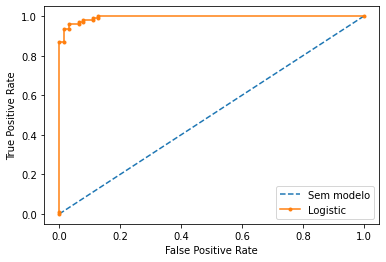

In [19]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sem modelo')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()